<a href="https://colab.research.google.com/github/vcorredorg/SenalesySistemas2025/blob/main/Serie_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Serie de Fourier

In [27]:
#Importar librerías
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Ejercicio: Serie exponencial de Fourier

Encontrar la representación por **serie exponencial de Fourier** de la señal  

$$
x(t) = A \, \text{rect}_{\tau/2}(t), \quad t \in [-\tau/2, \, \tau/2]
$$  

Graficar:

- El **espectro**  
- La **fase del espectro**  
- La **reconstrucción** para  
  $$
  n \in \{0, \pm1, \pm2, \ldots\}
  $$
- Determinar el **valor del error relativo** para cada valor de $n$.  

Utilice el **ambiente de animación de Python** para mostrar los resultados.


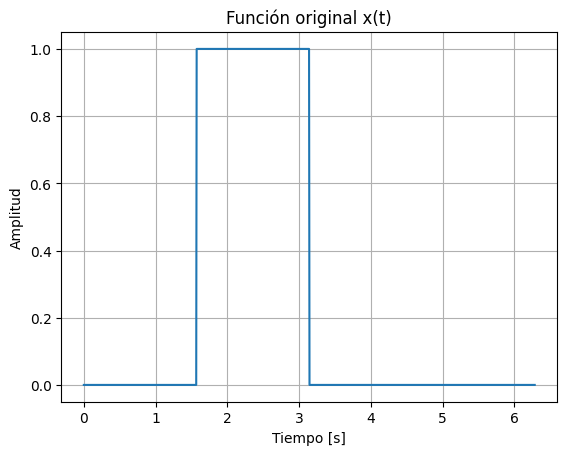

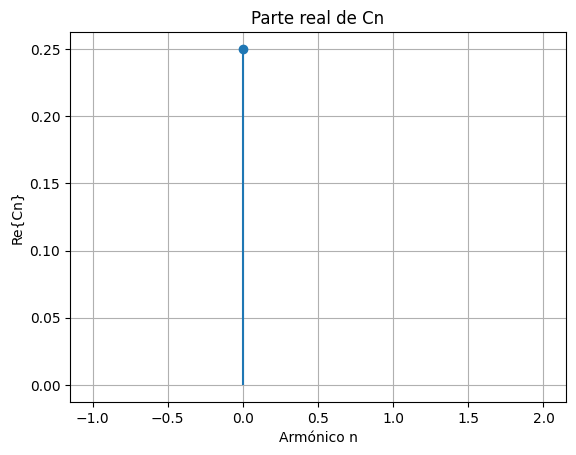

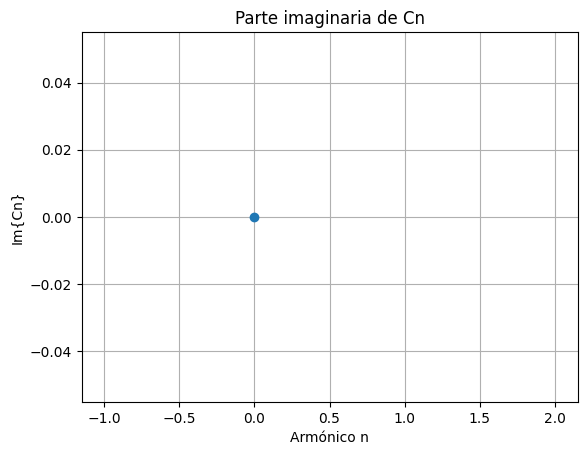

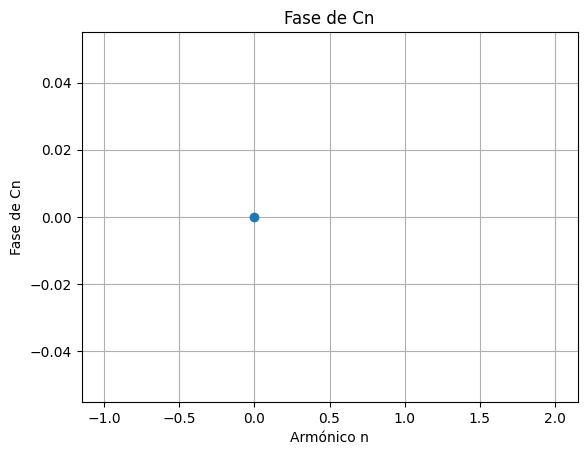

In [34]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

# Parámetros simbólicos
t = sym.Symbol('t', real=True)
T = 2 * sym.pi
w0 = 2 * sym.pi / T
n = sym.Symbol('n', integer=True)

# Definición simbólica de la función rectangular (1 entre T/4 y T/2)
x = sym.Heaviside(t - T/4) - sym.Heaviside(t - T/2)

# Graficar la función original
t_vals = np.linspace(0, float(T), 1000)
x_func = sym.lambdify(t, x, 'numpy')
x_vals = x_func(t_vals)

plt.figure()
plt.title("Función original x(t)")
plt.plot(t_vals, x_vals)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# Espectro de Fourier
f = x * sym.exp(-sym.I * n * w0 * t)
Cn = (1/T) * sym.integrate(f, (t, 0, T))
Cn_sim = sym.simplify(Cn)

# Evaluar Cn para varios n
n_vals = np.arange(-1, 3)
Cn_func = sym.lambdify(n, Cn_sim, 'numpy')
Cn_vals = Cn_func(n_vals)

# Graficar parte real e imaginaria
plt.figure()
plt.stem(n_vals, np.real(Cn_vals), basefmt=" ")
plt.title("Parte real de Cn")
plt.xlabel("Armónico n")
plt.ylabel("Re{Cn}")
plt.grid(True)
plt.show()

plt.figure()
plt.stem(n_vals, np.imag(Cn_vals), basefmt=" ")
plt.title("Parte imaginaria de Cn")
plt.xlabel("Armónico n")
plt.ylabel("Im{Cn}")
plt.grid(True)
plt.show()

#Graficar fase
plt.figure()
plt.stem(n_vals, np.angle(Cn_vals), basefmt=" ")
plt.title("Fase de Cn")
plt.xlabel("Armónico n")
plt.ylabel("Fase de Cn")
plt.grid(True)
